前置知识

MFCC（Mel Frequency Cepstral Coefficients）是语音信号处理中的一种特征提取方法。它主要用于将语音信号转换为一组准确表示声学特征的系数。以下是关于MFCC参数的一些解释：

1. **预加重**：在提取MFCC之前，通常会对语音信号进行预加重。这是通过应用一个高通滤波器来突出高频部分，以平衡信号的频谱。

2. **分帧**：语音信号通常被划分为小的时间片段，称为帧。每个帧通常包含10到30毫秒的语音信号。

3. **加窗**：对每个帧应用一个窗函数（例如汉明窗），以减少边界效应，并使信号在时域上平滑过渡。

4. **快速傅里叶变换（FFT）**：对每个帧进行FFT，从时域转换为频域。

5. **梅尔滤波器组**：在频域上，将声音信号通过一系列梅尔滤波器进行滤波，这些滤波器的形状近似模拟了人耳对不同频率的感知。

6. **对数操作**：对通过梅尔滤波器组后的结果取对数，以便表示频率轴上的声音强度。

7. **离散余弦变换（DCT）**：对取对数后的滤波器输出应用DCT，以获取最终的MFCC系数。通过DCT可以压缩数据并减少特征之间的冗余。

以下分为两个部分，分别是CPU版本使用librosa提取，以及GPU版本通过torchaudio加速提取

安装库

In [2]:
!pip install librosa

Looking in indexes: https://mirrors.bfsu.edu.cn/pypi/web/simple
  Using cached https://mirrors.bfsu.edu.cn/pypi/web/packages/e2/a2/4f639c1168d7aada749a896afb4892a831e2041bebdcf636aebfe9e86556/librosa-0.10.1-py3-none-any.whl (253 kB)
  Using cached https://mirrors.bfsu.edu.cn/pypi/web/packages/57/8d/30aa32745af16af0a9a650115fbe81bde7c610ed5c21b381fca0196f3a7f/audioread-3.0.1-py3-none-any.whl (23 kB)
  Using cached https://mirrors.bfsu.edu.cn/pypi/web/packages/c1/07/7591f4efd29e65071c3a61b53725036ea8f73366a4920a481ebddaf8d0ca/soundfile-0.12.1-py2.py3-none-manylinux_2_31_x86_64.whl (1.2 MB)
  Using cached https://mirrors.bfsu.edu.cn/pypi/web/packages/1a/a5/5174dac3957ac412e80a00f30b6507031fcab7000afc9ea0ac413bddcff2/pooch-1.8.0-py3-none-any.whl (62 kB)
  Using cached https://mirrors.bfsu.edu.cn/pypi/web/packages/2b/97/cbce72f9c8b5c9c667eb55dc55be20a87c610dba55c0466c77498c1a8c97/soxr-0.3.7-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.3 MB)
  Using cached https://mirrors.bf

导入库

In [3]:
import os
import csv
import sys
import numpy
import librosa 
import librosa.display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from scipy.io import wavfile

数据读取

In [19]:
audio_6db = [1, 2, 3, 4, 5, 6, 7, 8]
audio_0db = [1, 2, 3, 4, 5, 6, 7, 8]
audio_min6db = [1, 2, 3, 4, 5, 6, 7, 8]

sampling_rate, audio_6db[0] = wavfile.read('dataset/6dB/fan/id_00/normal/00000001.wav')
sampling_rate, audio_6db[1] = wavfile.read('dataset/6dB/fan/id_00/abnormal/00000001.wav')
sampling_rate, audio_6db[2] = wavfile.read('dataset/6dB/pump/id_00/normal/00000001.wav')
sampling_rate, audio_6db[3] = wavfile.read('dataset/6dB/pump/id_00/abnormal/00000001.wav')
sampling_rate, audio_6db[4] = wavfile.read('dataset/6dB/slider/id_00/normal/00000001.wav')
sampling_rate, audio_6db[5] = wavfile.read('dataset/6dB/slider/id_00/abnormal/00000001.wav')
sampling_rate, audio_6db[6] = wavfile.read('dataset/6dB/valve/id_00/normal/00000001.wav')
sampling_rate, audio_6db[7] = wavfile.read('dataset/6dB/valve/id_00/abnormal/00000001.wav')

sampling_rate, audio_0db[0] = wavfile.read('dataset/0dB/fan/id_00/normal/00000001.wav')
sampling_rate, audio_0db[1] = wavfile.read('dataset/0dB/fan/id_00/abnormal/00000001.wav')
sampling_rate, audio_0db[2] = wavfile.read('dataset/0dB/pump/id_00/normal/00000001.wav')
sampling_rate, audio_0db[3] = wavfile.read('dataset/0dB/pump/id_00/abnormal/00000001.wav')
sampling_rate, audio_0db[4] = wavfile.read('dataset/0dB/slider/id_00/normal/00000001.wav')
sampling_rate, audio_0db[5] = wavfile.read('dataset/0dB/slider/id_00/abnormal/00000001.wav')
sampling_rate, audio_0db[6] = wavfile.read('dataset/0dB/valve/id_00/normal/00000001.wav')
sampling_rate, audio_0db[7] = wavfile.read('dataset/0dB/valve/id_00/abnormal/00000001.wav')

sampling_rate, audio_min6db[0] = wavfile.read('dataset/min6dB/fan/id_00/normal/00000001.wav')
sampling_rate, audio_min6db[1] = wavfile.read('dataset/min6dB/fan/id_00/abnormal/00000001.wav')
sampling_rate, audio_min6db[2] = wavfile.read('dataset/min6dB/pump/id_00/normal/00000001.wav')
sampling_rate, audio_min6db[3] = wavfile.read('dataset/min6dB/pump/id_00/abnormal/00000001.wav')
sampling_rate, audio_min6db[4] = wavfile.read('dataset/min6dB/slider/id_00/normal/00000001.wav')
sampling_rate, audio_min6db[5] = wavfile.read('dataset/min6dB/slider/id_00/abnormal/00000001.wav')
sampling_rate, audio_min6db[6] = wavfile.read('dataset/min6dB/valve/id_00/normal/00000001.wav')
sampling_rate, audio_min6db[7] = wavfile.read('dataset/min6dB/valve/id_00/abnormal/00000001.wav')

# 提取MFCC

In [24]:
# 循环遍历所有音频，提取MFCC参数
mfcc_0db = []
mfcc_6db = []
mfcc_min6db = []

for audio in audio_0db:
    audio = audio.astype('float32')
    mfcc = librosa.feature.mfcc(y=audio, sr=sampling_rate, n_mfcc=40)
    mfcc = np.squeeze(mfcc)
    mfcc_0db.append(mfcc)

for audio in audio_6db:
    audio = audio.astype('float32')
    mfcc = librosa.feature.mfcc(y=audio, sr=sampling_rate, n_mfcc=40)
    mfcc = np.squeeze(mfcc)
    mfcc_6db.append(mfcc)

for audio in audio_min6db:
    audio = audio.astype('float32')
    mfcc = librosa.feature.mfcc(y=audio, sr=sampling_rate, n_mfcc=40)
    mfcc = np.squeeze(mfcc)
    mfcc_min6db.append(mfcc)

In [25]:
print(mfcc_0db[0].shape)
print(mfcc_6db[0].shape)
print(mfcc_min6db[0].shape)

(160000, 40)
(160000, 40)
(160000, 40)


# 展示MFCC

## 信噪比为0dB时

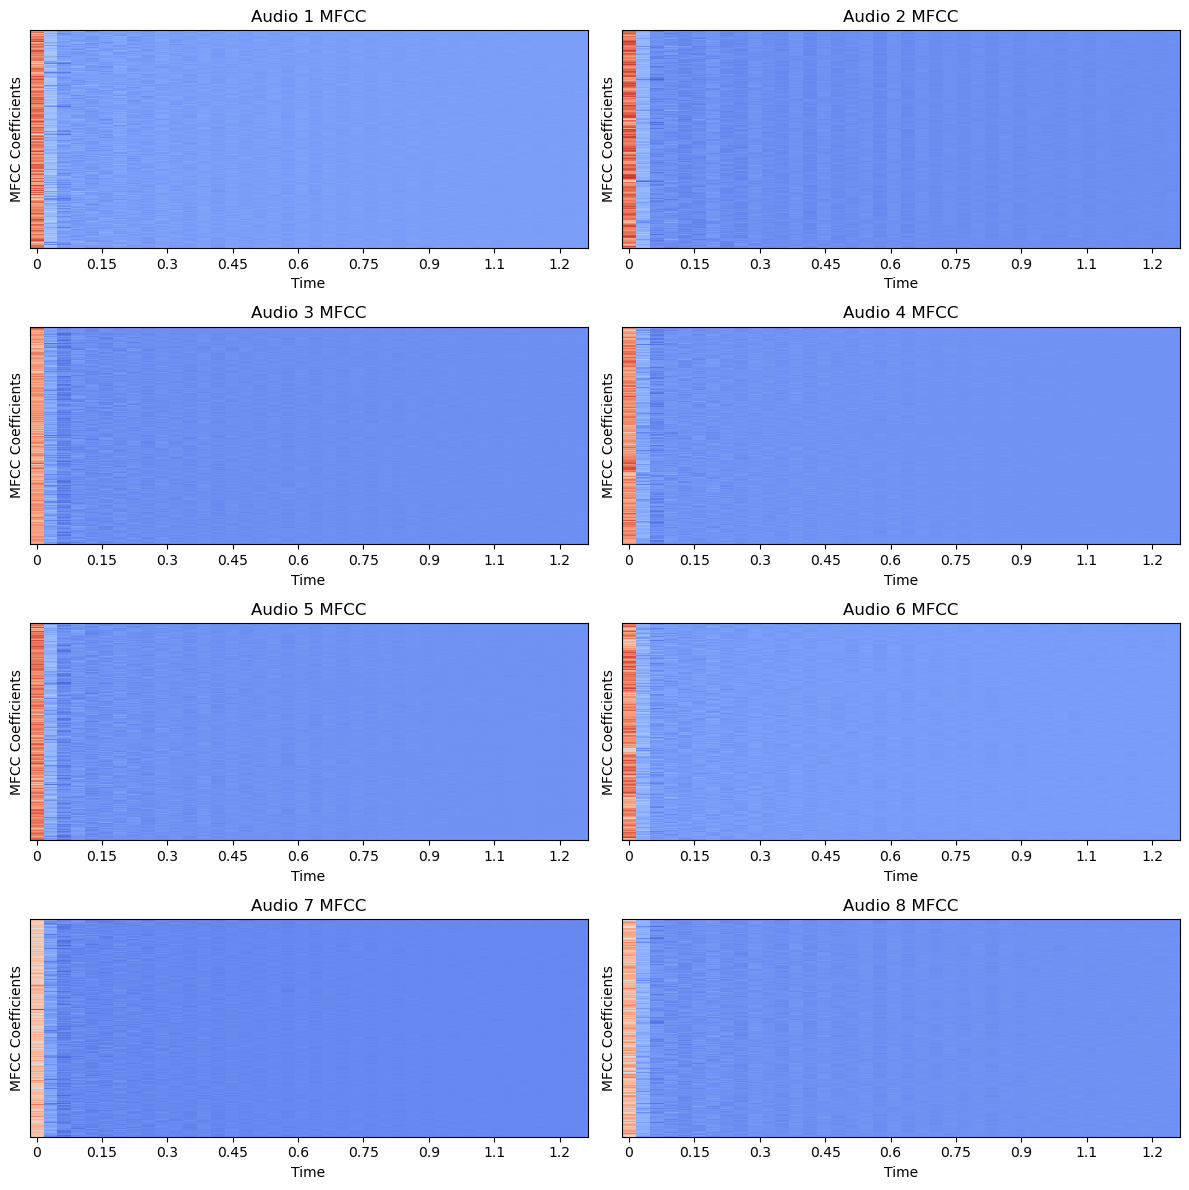

In [5]:
# 创建一个具有八个子图的图像对象
fig, axes = plt.subplots(4, 2, figsize=(12, 12))

# 循环遍历八个子图，并绘制MFCC图谱
for i, ax in enumerate(axes.flatten()):
    mfcc_data = mfcc_0db[i]  # 假设mfcc_0db包含MFCC参数数据
    librosa.display.specshow(mfcc_data, x_axis='time', sr=sampling_rate, ax=ax)
    ax.set_xlabel('Time')
    ax.set_ylabel('MFCC Coefficients')
    ax.set_title(f'Audio {i+1} MFCC')

# 调整子图之间的间距
plt.tight_layout()

# 显示图像
plt.show()

## 信噪比为6dB时

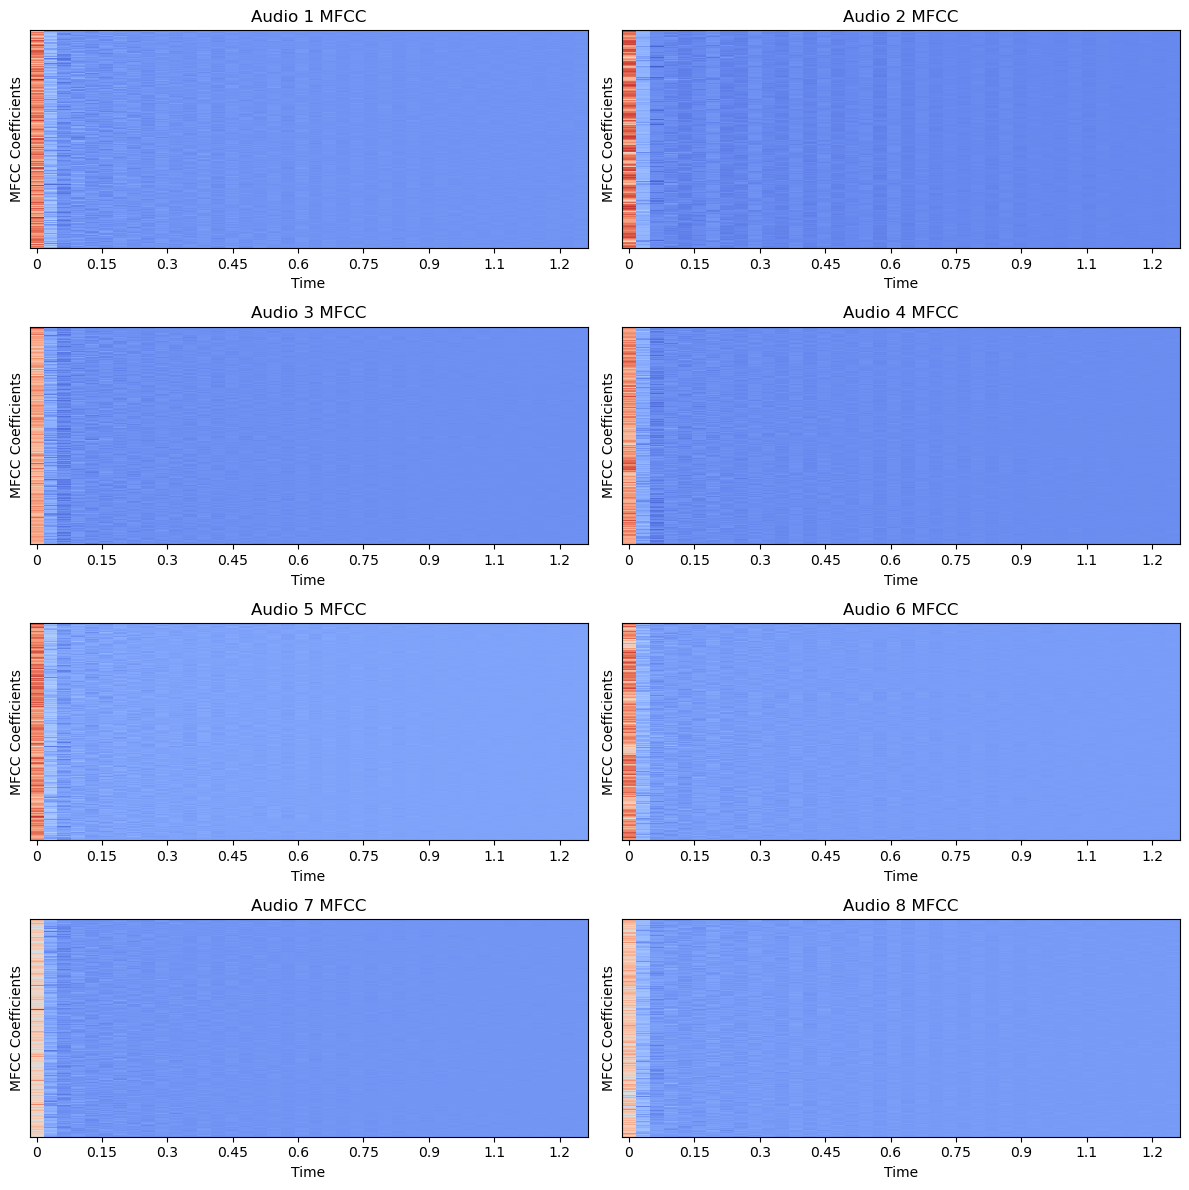

In [6]:
# 创建一个具有八个子图的图像对象
fig, axes = plt.subplots(4, 2, figsize=(12, 12))

# 循环遍历八个子图，并绘制MFCC图谱
for i, ax in enumerate(axes.flatten()):
    mfcc_data = mfcc_6db[i]  # 假设mfcc_0db包含MFCC参数数据
    librosa.display.specshow(mfcc_data, x_axis='time', sr=sampling_rate, ax=ax)
    ax.set_xlabel('Time')
    ax.set_ylabel('MFCC Coefficients')
    ax.set_title(f'Audio {i+1} MFCC')

# 调整子图之间的间距
plt.tight_layout()

# 显示图像
plt.show()

## 信噪比为-6dB时

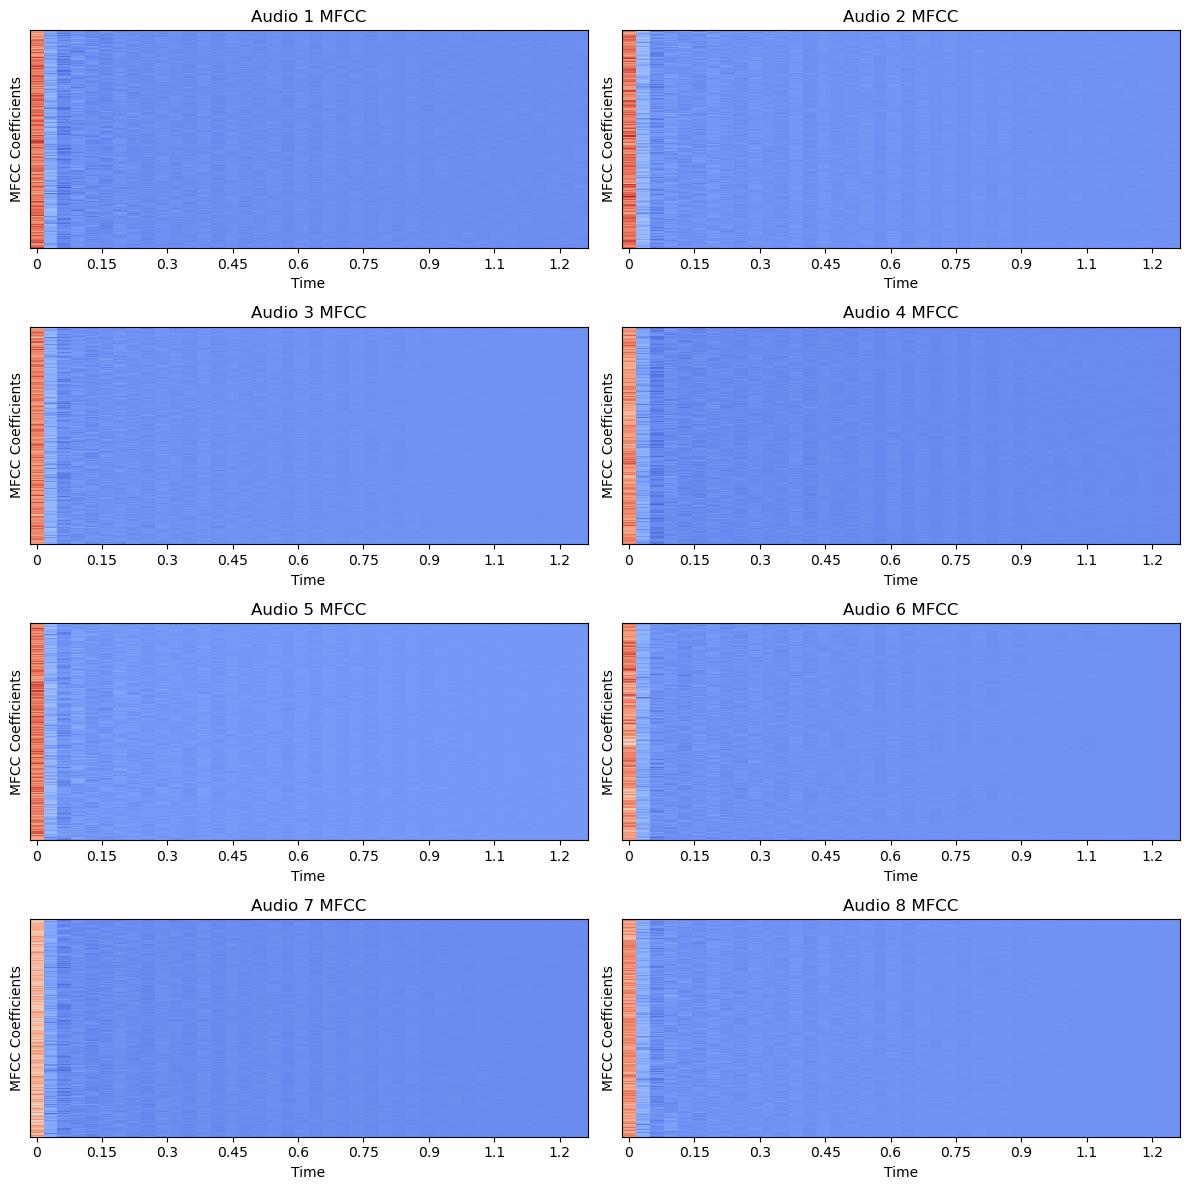

In [7]:
# 创建一个具有八个子图的图像对象
fig, axes = plt.subplots(4, 2, figsize=(12, 12))

# 循环遍历八个子图，并绘制MFCC图谱
for i, ax in enumerate(axes.flatten()):
    mfcc_data = mfcc_min6db[i]  # 假设mfcc_0db包含MFCC参数数据
    librosa.display.specshow(mfcc_data, x_axis='time', sr=sampling_rate, ax=ax)
    ax.set_xlabel('Time')
    ax.set_ylabel('MFCC Coefficients')
    ax.set_title(f'Audio {i+1} MFCC')

# 调整子图之间的间距
plt.tight_layout()

# 显示图像
plt.show()

综合也可以直观看出数据差异，下面进行批量提取

In [3]:
# 定义特征提取函数
max_pad_len = 432
np.set_printoptions(threshold=sys.maxsize)
def mfcc_feature(file_name):
    audio, sample_rate = librosa.load(file_name) 
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    pad_width = np.abs(max_pad_len - mfccs.shape[1])
    mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
    return mfccs

In [ ]:
# 进入dataset目录
os.chdir('/home/jovyan/mimii-code/dataset')

# 定义snr目录列表和device目录列表
snr_dirs = ['0dB', '6dB', 'min6dB']
device_dirs = ['pump', 'slider', 'valve', 'fan']

# 搜集所有.wav文件的信息
data = []

# 遍历snr目录
for snr_dir in snr_dirs:
    # 赋值snr变量为当前目录
    snr = snr_dir
    
    # 遍历device目录
    for device_dir in device_dirs:
        # 赋值device变量为当前目录
        device = device_dir
        
        # 找出所有包含.wav的子目录，并赋值给label变量
        for root, dirs, files in os.walk(os.path.join(snr, device)):
            label = os.path.basename(root)
            
            # 检查是否存在.wav文件
            wav_files = [f for f in files if f.lower().endswith('.wav')]
            if len(wav_files) > 0:
                # 遍历.wav文件并提取MFCC特征
                for wav_file in wav_files:
                    wav_filepath = os.path.abspath(os.path.join(root, wav_file))
                    # 提取MFCC特征的代码在这里执行，使用wav_filepath作为输入文件路径
                    mfcc = mfcc_feature(wav_filepath)
                    mfcc = np.asarray(mfcc, dtype=np.int32).reshape(mfcc.shape[0],mfcc.shape[1])
                    mfcc = mfcc.flatten()
                    # 将MFCC特征与相关信息添加到列表中（snr, label, device）
                    data.append([mfcc, snr, label, device])

# 保存数据到CSV文件
with open("data.csv", 'w') as f:
    writer = csv.writer(f, delimiter=',')
    for row in data:
        writer.writerow(row)

In [3]:
# 读取CSV文件
df = pd.read_csv('data.csv')

# 添加索引
df.columns = ['mfcc', 'snr', 'label', 'device']

# 显示结果
print(df.head())

                                                mfcc  snr   label device
0  [-432 -408 -409 -410 -406 -407 -413 -410 -410 ...  0dB  normal   pump
1  [-401 -380 -393 -396 -394 -394 -397 -392 -390 ...  0dB  normal   pump
2  [-419 -388 -391 -390 -388 -390 -391 -392 -390 ...  0dB  normal   pump
3  [-410 -387 -389 -390 -394 -393 -392 -390 -392 ...  0dB  normal   pump
4  [-406 -381 -380 -382 -381 -381 -378 -379 -380 ...  0dB  normal   pump


In [2]:
# 将DataFrame保存为CSV文件
df.to_csv('release_data.csv', index=False)

查看release_data.csv

1. 在当前的参数规模下，release_data.csv数据大小为4.4GB，这是通过特征方法把129GB的MIMII数据提取出来的特征，完成了数据规模的压缩
2. 数据集当前表示为，第一列为MFCC参数，第二列参数为噪声比，第三列为标签，第四列为设备类型

注意，release_data.csv被重命名为data.csv使用

观察最终的数据分布

In [4]:
data=pd.read_csv('data.csv')

print(data)

                                                    mfcc     snr     label  \
0      [-432 -408 -409 -410 -406 -407 -413 -410 -410 ...     0dB    normal   
1      [-401 -380 -393 -396 -394 -394 -397 -392 -390 ...     0dB    normal   
2      [-419 -388 -391 -390 -388 -390 -391 -392 -390 ...     0dB    normal   
3      [-410 -387 -389 -390 -394 -393 -392 -390 -392 ...     0dB    normal   
4      [-406 -381 -380 -382 -381 -381 -378 -379 -380 ...     0dB    normal   
...                                                  ...     ...       ...   
54051  [-403 -383 -392 -391 -392 -394 -397 -393 -393 ...  min6dB  abnormal   
54052  [-365 -341 -342 -339 -337 -338 -344 -346 -342 ...  min6dB  abnormal   
54053  [-342 -332 -361 -357 -355 -357 -361 -359 -357 ...  min6dB  abnormal   
54054  [-380 -356 -370 -371 -370 -370 -375 -375 -374 ...  min6dB  abnormal   
54055  [-382 -349 -344 -346 -334 -315 -318 -325 -331 ...  min6dB  abnormal   

      device  
0       pump  
1       pump  
2       pump  
3  